 data set is Apple stock data It is a regression model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltSS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
d = pd.read_csv('/content/updated_apple_stock_data (1).csv')
d.head(10000)

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,12,12,1980
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,15,12,1980
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,16,12,1980
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,17,12,1980
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,18,12,1980
...,...,...,...,...,...,...,...,...,...,...
9995,2020-08-04,109.132500,110.790001,108.387497,109.665001,108.471336,173071600,4,8,2020
9996,2020-08-05,109.377502,110.392502,108.897499,110.062500,108.864510,121776800,5,8,2020
9997,2020-08-06,110.404999,114.412498,109.797501,113.902496,112.662712,202428800,6,8,2020
9998,2020-08-07,113.205002,113.675003,110.292503,111.112503,110.101250,198045600,7,8,2020


In [ ]:
x=d.drop('Close',axis=1)
x=x.drop('Date',axis=1)
print(x)
y=d['Close']
print(y)

             Open        High         Low   Adj Close     Volume  Day  Month  \
0        0.128348    0.128906    0.128348    0.100323  469033600   12     12   
1        0.122210    0.122210    0.121652    0.095089  175884800   15     12   
2        0.113281    0.113281    0.112723    0.088110  105728000   16     12   
3        0.115513    0.116071    0.115513    0.090291   86441600   17     12   
4        0.118862    0.119420    0.118862    0.092908   73449600   18     12   
...           ...         ...         ...         ...        ...  ...    ...   
10404  160.509995  164.479996  159.759995  163.979996  123351200   18      3   
10405  163.509995  166.350006  163.009995  165.380005   95811400   21      3   
10406  165.509995  169.419998  164.910004  168.820007   81532000   22      3   
10407  167.990005  172.639999  167.649994  170.210007   98062700   23      3   
10408  171.059998  174.139999  170.210007  174.070007   90018700   24      3   

       Year  
0      1980  
1      1980

In [ ]:
x = x.fillna(0)
y = y.fillna(0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.1)
ridge_reg = Ridge(alpha=1.0)
svm_reg = SVR(kernel='linear')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

linear_reg.fit(x_train_scaled, y_train)
lasso_reg.fit(x_train_scaled, y_train)
ridge_reg.fit(x_train_scaled, y_train)
svm_reg.fit(x_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+03, tolerance: 7.501e+02
  model = cd_fast.enet_coordinate_descent(


SVR(kernel='linear')

In [ ]:
y_pred_linear = linear_reg.predict(x_test)
y_pred_lasso = lasso_reg.predict(x_test)
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_svm = svm_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Linear regression errors

In [ ]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

Lasso regression errors

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

Ridge regression errors

In [ ]:
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

SVM regression errors

In [ ]:
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

In [ ]:
print(f"Linear Regression - MSE: {mse_linear}, MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Lasso Regression - MSE: {mse_lasso}, MAE: {mae_lasso}, RMSE: {rmse_lasso}")
print(f"Ridge Regression - MSE: {mse_ridge}, MAE: {mae_ridge}, RMSE: {rmse_ridge}")
print(f"SVM Regression - MSE: {mse_svm}, MAE: {mae_svm}, RMSE: {rmse_svm}")

Linear Regression - MSE: 127197820512559.78, MAE: 7919543.972275684, RMSE: 11278201.120416313
Lasso Regression - MSE: 977806.5304893327, MAE: 428.02303321772996, RMSE: 988.8410036448391
Ridge Regression - MSE: 336254246407163.06, MAE: 12876574.792079998, RMSE: 18337236.607710637
SVM Regression - MSE: 39063345009441.945, MAE: 4388611.661311128, RMSE: 6250067.60038977


KNN Prediction MSE, MAE, RMSE

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = np.sqrt(mse_knn)

print(f"KNN Metrics:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn}")


KNN Metrics:
Mean Squared Error (MSE): 957.6339160677026
Mean Absolute Error (MAE): 17.521913846685877
Root Mean Squared Error (RMSE): 30.945660698516402


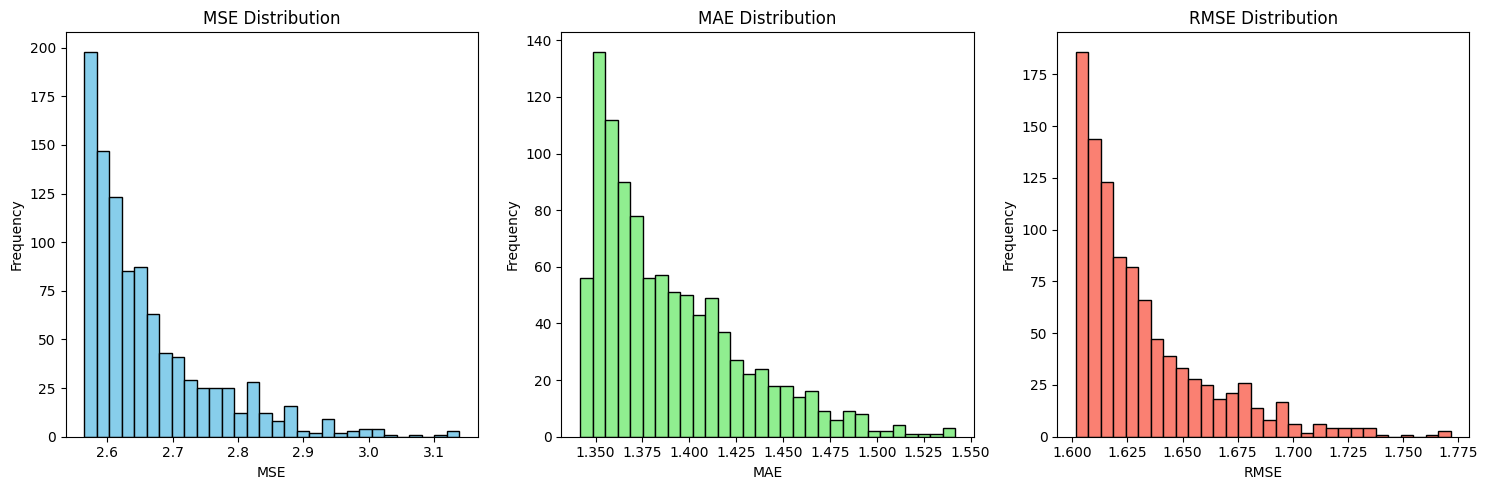

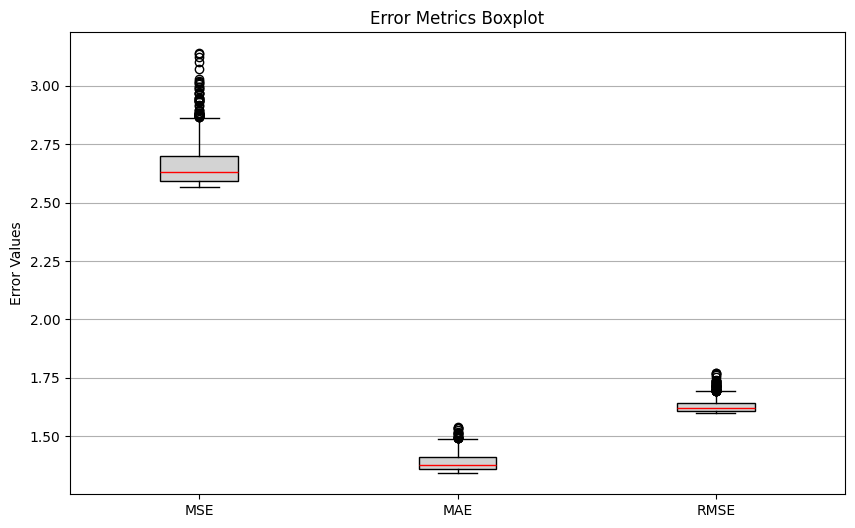

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

np.random.seed(42)
x_train = np.random.rand(100, 1) * 10
y_train = 2.5 * x_train.squeeze() + np.random.randn(100) * 2

x_test = np.random.rand(20, 1) * 10
y_test = 2.5 * x_test.squeeze() + np.random.randn(20) * 2
n_bootstrap = 1000

mse_list = []
mae_list = []
rmse_list = []

for i in range(n_bootstrap):

    x_resampled, y_resampled = resample(x_train, y_train, random_state=i)

    model = LinearRegression()
    model.fit(x_resampled, y_resampled)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mse_list, bins=30, color='skyblue', edgecolor='black')
plt.title('MSE Distribution')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_list, bins=30, color='lightgreen', edgecolor='black')
plt.title('MAE Distribution')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rmse_list, bins=30, color='salmon', edgecolor='black')
plt.title('RMSE Distribution')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([mse_list, mae_list, rmse_list], labels=['MSE', 'MAE', 'RMSE'], patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='red'))
plt.title('Error Metrics Boxplot')
plt.ylabel('Error Values')
plt.grid(axis='y')
plt.show()
